# Regresión lógistica para predicción bancaria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("/Users/milan/OneDrive/Documentos/python-ml-course-master/datasets/bank/bank.csv", sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape, data.columns.values

((4119, 21),
 array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object))

In [4]:
### Conversión de variables strig a int
data["y"]=(data["y"]== "yes").astype(int)
### Conversión de variables .where() de numpy
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [5]:
data["education"]=np.where(data["education"]=="basic.9y","Basic",data["education"])
data["education"]=np.where(data["education"]=="basic.6y","Basic",data["education"])
data["education"]=np.where(data["education"]=="basic.4y","Basic",data["education"])
data["education"]=np.where(data["education"]=="high.school","High School",data["education"])
data["education"]=np.where(data["education"]=="professional.course","Professional Course",data["education"])
data["education"]=np.where(data["education"]=="illiterate","Illiterate",data["education"])
data["education"]=np.where(data["education"]=="unknown","Unknown",data["education"])
data["education"]=np.where(data["education"]=="university.degree","University Degree",data["education"])
data["job"]=np.where(data["job"]=="blue-collar","bluecollar",data["job"])
data["job"]=np.where(data["job"]=="self-employed","selfemployed",data["job"])
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [6]:
# sondeo de datos de quienes efectivamente compraron el producto, esto señalado en la fila y
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [7]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [8]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra')

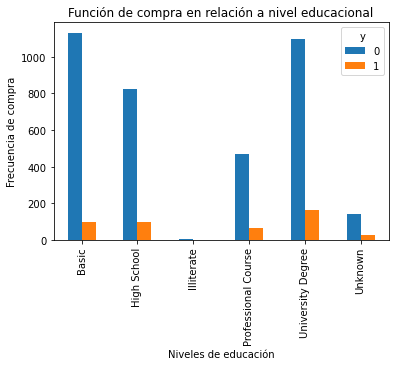

In [9]:
#Visualización de datos en relación frecuencia de aceptación de producto vs nivel educacional
pd.crosstab(data["education"], data["y"]).plot(kind="bar")
plt.title("Función de compra en relación a nivel educacional")
plt.xlabel("Niveles de educación")
plt.ylabel("Frecuencia de compra")

Text(0.5, 1.0, 'Proporción de compras en relación al estado civil de los clientes')

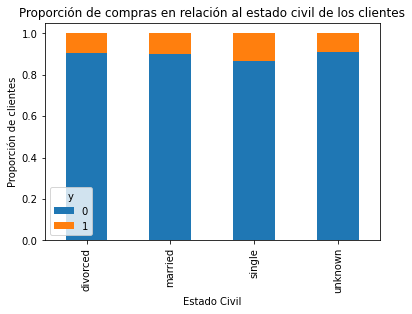

In [10]:
#Aceptación del producto VS Estado Civil
tb=pd.crosstab(data.marital, data.y)
tb=tb.div(tb.sum(1),axis=0)
tb.plot(kind="bar", stacked=True)
plt.xlabel("Estado Civil")
plt.ylabel("Proporción de clientes")
plt.title("Proporción de compras en relación al estado civil de los clientes")


Text(0, 0.5, 'Frecuencia de compra')

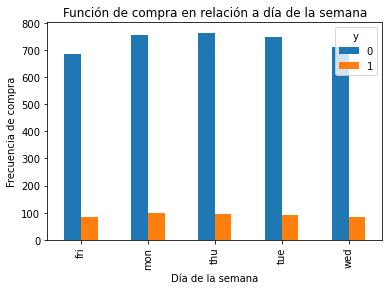

In [11]:
#Relación días de la semana y compra del producto
pd.crosstab(data["day_of_week"], data["y"]).plot(kind="bar")
plt.title("Función de compra en relación a día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

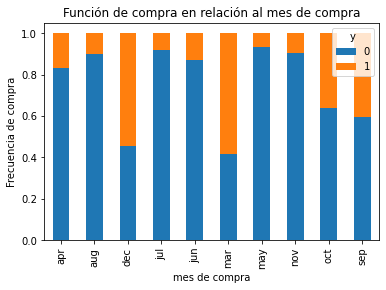

In [12]:
#Relación mes y compra del producto
tb1=pd.crosstab(data["month"], data["y"])
tb1=tb1.div(tb1.sum(1),axis=0)
tb1.plot(kind="bar", stacked=True)
plt.title("Función de compra en relación al mes de compra")
plt.xlabel("mes de compra")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Cantidad de compradores')

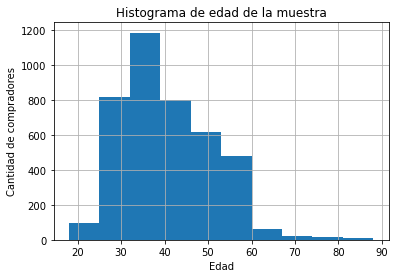

In [13]:
#Histograma de rango de edad
data.age.hist()
plt.title("Histograma de edad de la muestra")
plt.xlabel("Edad")
plt.ylabel("Cantidad de compradores")

## Conversión de variables categoricas dummy

In [14]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [15]:
data_vars = data.columns.values.tolist()

In [16]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]
to_keep
bank_data=data[to_keep]
data.columns.values,bank_data.columns.values

(array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
        'job_bluecollar', 'job_entrepreneur', 'job_housemaid',
        'job_management', 'job_retired', 'job_selfemployed',
        'job_services', 'job_student', 'job_technician', 'job_unemployed',
        'job_unknown', 'marital_divorced', 'marital_married',
        'marital_single', 'marital_unknown', 'education_Basic',
        'education_High School', 'education_Illiterate',
        'education_Professional Course', 'education_University Degree',
        'education_Unknown', 'housing_no', 'housing_unknown',
        'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
        'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
        'month_dec', 'month_jul', 'month_jun', 'month_mar

In [17]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]
bank_data[X].columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_bluecollar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_selfemployed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_w

## Selección de razgos del modelo


In [18]:
n=12
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression(solver='liblinear')

In [20]:
rfe = RFE(lr, n_features_to_select=n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [21]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]
[33 38 19 43  1 12 26 25  1 37 23  3  1 36  2 39  1  5 32 30 11 45 20 42
 29 47 41 34 46 13 14  8  9  6 21 22 15 16 18  4 31 24  1  1  1  1  1 17
  1 44 35 27 40 28 10  1  7  1]


In [22]:
z=zip(bank_data_vars,rfe.support_,rfe.ranking_)
list(z)

[('age', False, 33),
 ('duration', False, 38),
 ('campaign', False, 19),
 ('pdays', False, 43),
 ('previous', True, 1),
 ('emp.var.rate', False, 12),
 ('cons.price.idx', False, 26),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 37),
 ('y', False, 23),
 ('job_admin.', False, 3),
 ('job_bluecollar', True, 1),
 ('job_entrepreneur', False, 36),
 ('job_housemaid', False, 2),
 ('job_management', False, 39),
 ('job_retired', True, 1),
 ('job_selfemployed', False, 5),
 ('job_services', False, 32),
 ('job_student', False, 30),
 ('job_technician', False, 11),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 20),
 ('marital_divorced', False, 42),
 ('marital_married', False, 29),
 ('marital_single', False, 47),
 ('marital_unknown', False, 41),
 ('education_Basic', False, 34),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 13),
 ('education_Professional Course', False, 14),
 ('education_University Degree', False, 8),
 ('education_Unk

In [23]:
important_cols=["poutcome_nonexistent","day_of_week_wed","month_nov","month_mar","month_jun", "month_jul", "month_dec","month_aug", "job_retired", "job_bluecollar", "euribor3m", "previous"]
X=bank_data[important_cols]
Y = bank_data['y']
X,Y

(      poutcome_nonexistent  day_of_week_wed  month_nov  month_mar  month_jun  \
 0                        1                0          0          0          0   
 1                        1                0          0          0          0   
 2                        1                1          0          0          1   
 3                        1                0          0          0          1   
 4                        1                0          1          0          0   
 ...                    ...              ...        ...        ...        ...   
 4114                     1                0          0          0          0   
 4115                     1                0          0          0          0   
 4116                     0                0          0          0          0   
 4117                     1                0          0          0          0   
 4118                     1                1          1          0          0   
 
       month_jul  month_de

## Implementación de regresión lógistica con statsmodels

In [24]:
import statsmodels.api as sm

In [25]:
logit_model = sm.Logit(Y,X)

In [26]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [27]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2020-09-18 23:07  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
job_bluecollar       -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
=====================================================================

"""

## Implementación de regresión lógistica con Scikitlearn

In [28]:
from sklearn import linear_model

In [29]:
logit_model2 = linear_model.LogisticRegression()
logit_model2.fit(X,Y)

LogisticRegression()

In [30]:
logit_model2.score(X,Y)

0.8958485069191552

In [31]:
pd.DataFrame(list(zip(X.columns,np.transpose(logit_model2.coef_))))

,0,1
0,poutcome_nonexistent,[0.3549452062542216]
1,day_of_week_wed,[0.04611312725992096]
2,month_nov,[0.45770841910638566]
3,month_mar,[1.6386680234603184]
4,month_jun,[1.0566897056474056]
5,month_jul,[0.9630554140676261]
6,month_dec,[1.1943974572125269]
7,month_aug,[0.629258889507956]
8,job_retired,[0.3616515908106025]
9,job_bluecollar,[-0.35331387434937045]


### Validación de modelo

Hacer la división de training/testing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.8, random_state=0)
y_train.shape, y_test.shape

((823,), (3296,))

In [34]:
lm= linear_model.LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [35]:
lm.score(x_train,y_train)

0.8955042527339003

In [36]:
pd.DataFrame(list(zip(x_train.columns,np.transpose(lm.coef_))))

,0,1
0,poutcome_nonexistent,[1.0854062664510384]
1,day_of_week_wed,[0.10213774362149693]
2,month_nov,[-0.04900152409290889]
3,month_mar,[0.8350258640367422]
4,month_jun,[0.8740990587700125]
5,month_jul,[0.7982569125456542]
6,month_dec,[0.7273981832362133]
7,month_aug,[0.30403046271381573]
8,job_retired,[-0.07617106016660735]
9,job_bluecollar,[-0.38791814819429826]


In [37]:
from IPython.display import display, Math, Latex
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [38]:
probs = lm.predict_proba(x_test)
prediction = lm.predict(x_test)
probs,prediction, probs[:,1].shape

(array([[0.9516018 , 0.0483982 ],
        [0.80181556, 0.19818444],
        [0.92663799, 0.07336201],
        ...,
        [0.95940004, 0.04059996],
        [0.7939216 , 0.2060784 ],
        [0.94946967, 0.05053033]]),
 array([0, 0, 0, ..., 0, 0, 0]),
 (3296,))

In [39]:
lm_tble_prediction=pd.DataFrame(list(zip(probs[:,1], y_test,np.transpose(prediction))),columns=["Probabilidad predicha","Real", "Predicción"] )
lm_tble_prediction

,Probabilidad predicha,Real,Predicción
0,0.048398,0,0
1,0.198184,0,0
2,0.073362,0,0
3,0.065076,0,0
4,0.034849,0,0
...,...,...,...
3291,0.027848,0,0
3292,0.064938,0,0
3293,0.040600,0,0
3294,0.206078,0,0


In [40]:
Count_predict=(lm_tble_prediction["Real"] == lm_tble_prediction["Predicción"]).value_counts()
Count_predict, lm_tble_prediction.shape

(True     2949
 False     347
 dtype: int64,
 (3296, 3))

In [41]:
2949/3296 

0.8947208737864077

In [42]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

**Dependiendo del caso es posible que establecer 0.5 la barra sea incorrecto, por lo que se puede aplicar epsilon el cual será un nuevo valor límite entre que un valor y otro es efectivamente 0/1**

In [43]:
## Epsilon 0.4
probs = lm.predict_proba(x_test)
probEpsilon = pd.DataFrame(list(zip(probs[:,1], y_test)),columns=["prob_predicha","Real"])                     
Epsilon = 0.4
probEpsilon["Y_Epsilon"]=np.where(probEpsilon["prob_predicha"]>Epsilon,1,0)
probEpsilon

,prob_predicha,Real,Y_Epsilon
0,0.048398,0,0
1,0.198184,0,0
2,0.073362,0,0
3,0.065076,0,0
4,0.034849,0,0
...,...,...,...
3291,0.027848,0,0
3292,0.064938,0,0
3293,0.040600,0,0
3294,0.206078,0,0


In [44]:
Count_predict=(probEpsilon["Real"] == probEpsilon["Y_Epsilon"]).value_counts()
Count_predict

True     2940
False     356
dtype: int64

In [45]:
2940/3296 

0.8919902912621359

In [46]:
pd.crosstab(probEpsilon.Y_Epsilon, columns="count")

col_0,count
Y_Epsilon,
0,3155
1,141


In [47]:
141/3155

0.04469096671949287

In [48]:
## Epsilon 0.2
probs = lm.predict_proba(x_test)
probEpsilon = pd.DataFrame(list(zip(probs[:,1], y_test)),columns=["prob_predicha","Real"])                     
Epsilon = 0.2
probEpsilon["Y_Epsilon"]=np.where(probEpsilon["prob_predicha"]>Epsilon,1,0)
Count_predict=(probEpsilon["Real"] == probEpsilon["Y_Epsilon"]).value_counts()
Count_predict

True     2717
False     579
dtype: int64

In [49]:
2717/3296 

0.8243325242718447

In [50]:
pd.crosstab(probEpsilon.Y_Epsilon, columns="count")

col_0,count
Y_Epsilon,
0,2662
1,634


In [51]:
634/2662

0.23816679188580014

In [52]:
from sklearn import metrics
metrics.accuracy_score(y_test, prediction)

0.8947208737864077

### Validación cruzada de k Iteraciones

In [53]:
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut

In [54]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [55]:
scores.mean()

0.8943903101599225

In [56]:
groups = np.ones(len(X)).astype(int)
logo = LeaveOneGroupOut()
logo =logo.split(X, Y, groups)
logo

<generator object BaseCrossValidator.split at 0x0000022BBEE96890>

### Matrices de confusión y curvar ROC

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [60]:
lm= linear_model.LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [68]:
probs=lm.predict_proba(x_test)
probs[:,1]

array([0.04590379, 0.16103354, 0.06783465, ..., 0.34901555, 0.02618995,
       0.42364252])

In [83]:
dt_probs=pd.DataFrame(probs[:,1], columns=["predicción"])
Epsilon=0.1
dt_probs["y_epsilon"]=np.where(dt_probs["predicción"]>Epsilon,1,0)
dt_probs["y_actual"]=list(y_test)
dt_probs

,predicción,y_epsilon,y_actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0
...,...,...,...
1231,0.062222,0,0
1232,0.062157,0,0
1233,0.349016,1,0
1234,0.026190,0,0


In [88]:
confusion_matrix = pd.crosstab(dt_probs["y_epsilon"], dt_probs["y_actual"])
confusion_matrix

y_actual,0,1
y_epsilon,,
0,806,40
1,308,82


In [89]:
true_negative=confusion_matrix[0][0]
true_positive=confusion_matrix[1][1]
false_negative=confusion_matrix[0][1]
false_positive=confusion_matrix[1][0]

In [91]:
Sensibilidad= true_positive/(true_positive+false_negative)
Sensibilidad

0.21025641025641026

In [101]:
especificidad= 1-true_negative/(true_negative+false_positive)
especificidad

0.08872305140961856

In [107]:
Epsilon=[0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for i in Epsilon:
    dt_probs["y_epsilon"]=np.where(dt_probs["predicción"]>i,1,0)
    dt_probs["y_actual"]=list(y_test)
    confusion_matrix = pd.crosstab(dt_probs["y_epsilon"], dt_probs["y_actual"])
    true_negative=confusion_matrix[0][0]
    true_positive=confusion_matrix[1][1]
    false_negative=confusion_matrix[1][0]
    false_positive=confusion_matrix[0][1]
    Sensibilidad= true_positive/(true_positive+false_negative)
    especificidad= 1-true_negative/(true_negative+false_positive)
    sensitivities.append(Sensibilidad)
    especifities_1.append(especificidad)
    

sensitivities.append(0)
especifities_1.append(0)
    
especifities_1, sensitivities

([1,
  0.7800718132854578,
  0.5646319569120287,
  0.2989228007181328,
  0.2764811490125674,
  0.24596050269299818,
  0.21992818671454217,
  0.12387791741472176,
  0.08617594254937166,
  0.07181328545780974,
  0.06463195691202872,
  0.022441651705565557,
  0.013464991023339312,
  0],
 [1,
  0.9344262295081968,
  0.8442622950819673,
  0.680327868852459,
  0.6721311475409836,
  0.6639344262295082,
  0.6229508196721312,
  0.5163934426229508,
  0.45081967213114754,
  0.4016393442622951,
  0.36065573770491804,
  0.1721311475409836,
  0.12295081967213115,
  0])

Text(0.5, 1.0, 'Curva ROC')

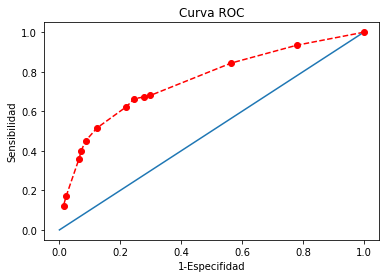

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [113]:
from sklearn import metrics
from ggplot import *

In [121]:
espc_1, sensit, epsilon_3 = metrics.roc_curve(y_test, list(probs[:,1]))


In [119]:
df = pd.DataFrame({
    "esp":espc_1,
    "sens":sensit
})
df


,esp,sens
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.002693,0.032787
...,...,...
233,0.985637,1.000000
234,0.990126,1.000000
235,0.992819,1.000000
236,0.997307,1.000000


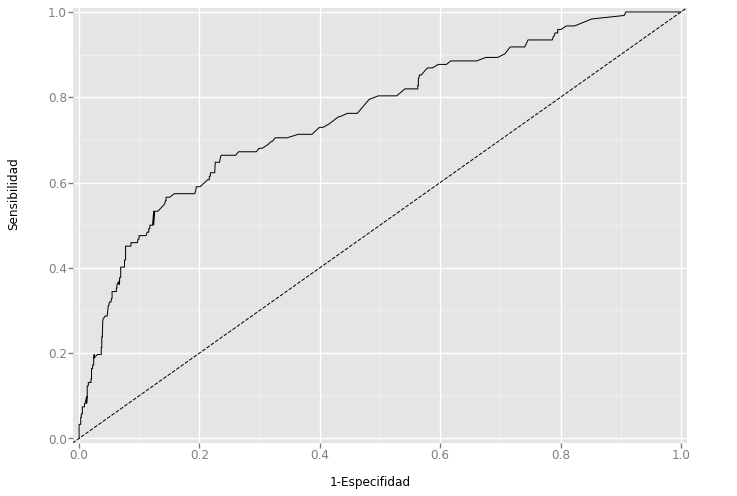

<ggplot: (149184489418)>

In [127]:
ggplot(df, aes(x="esp", y="sens"))+geom_line()+geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

In [128]:
auc = metrics.auc(espc_1, sensit)
auc

0.7579171204049798

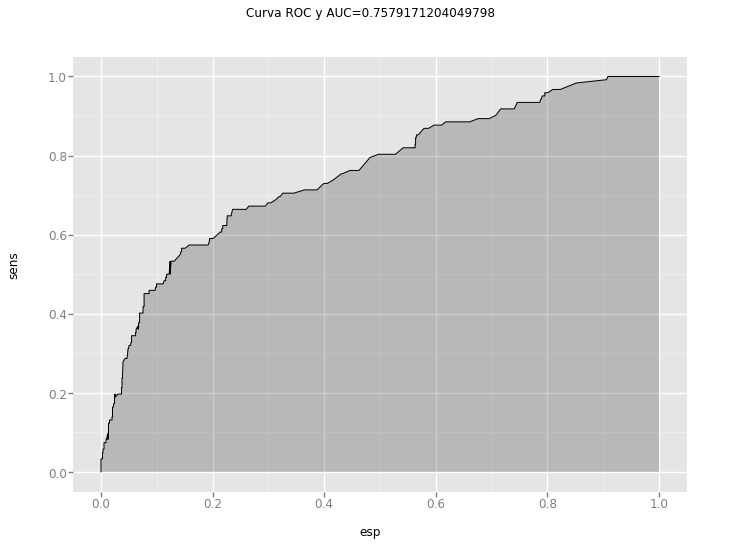

<ggplot: (149184073813)>

In [129]:
ggplot(df, aes(x="esp", y="sens")) + geom_area(alpha=0.25)+geom_line(aes(y="sens"))+ggtitle("Curva ROC y AUC=%s"%str(auc))